Kickstarter is a crowdfunding platform with a community of more than 10 million people comprising of creative, tech enthusiasts who help in bringing new projects to life.

Until now, more than $3 billion dollars have been contributed by the members in fueling creative projects. The projects can be literally anything – a device, a game, an app, a film etc.

Kickstarter works on all or nothing basis: a campaign is launched with a certain amount they want to raise, if it doesn’t meet its goal, the project owner gets nothing. For example: if a projects’s goal is $5000. Even if it gets funded till $4999, the project won’t be a success.

The goal is to predict whether it will be successfully funded or not? Looking into the dataset, what useful information can we extract from it, which variables are informative for our prediction and can we interpret the model?

The goal of this project is to build a classifier to predict whether a project will be successfully funded or not.

In [1]:
import json
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Function used to encode categorical variables
#Función usada para la codificación a true y false de variables categóricas
"""
:df: the dataset
:type df: pd.DataFrame
:feature_name: name of the column
:type feature_name: string
:categories: list of the categories
:type categories: list
:return:df[feature_name]: column with boolean value: true or false 
"""
def one_hot_encode(df, feature_name, categories):
    for category in categories:
        new_feature_name = '{}_{}'.format(feature_name, category)
        df[new_feature_name] = (df[feature_name] == category) * 1
    del df[feature_name]

In [3]:
#Load dataset
raw_df = pd.read_csv("data/data.zip")
raw_df.shape

(60000, 27)

In [5]:
#See statistics values
raw_df.describe()

,id,goal,deadline,created_at,launched_at,static_usd_rate,state
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.000000
mean,1.077772e+09,3.929289e+04,1.405078e+09,1.398590e+09,1.402169e+09,1.025770,0.497580
std,6.188910e+08,1.108792e+06,5.538528e+07,5.549642e+07,5.557587e+07,0.182620,0.499999
min,2.438000e+04,1.000000e+00,1.243556e+09,1.240335e+09,1.240967e+09,0.046325,0.000000
25%,5.388901e+08,1.800000e+03,1.363908e+09,1.356245e+09,1.361064e+09,1.000000,0.000000
50%,1.085288e+09,5.000000e+03,1.413312e+09,1.406515e+09,1.410386e+09,1.000000,0.000000
75%,1.609518e+09,1.200000e+04,1.446502e+09,1.440188e+09,1.443707e+09,1.000000,1.000000
max,2.147437e+09,1.000000e+08,1.500159e+09,1.499261e+09,1.499268e+09,1.716408,1.000000


In [6]:
raw_df.apply(pd.isna).sum()

id                            0
photo                         0
name                          2
blurb                         2
goal                          0
slug                          0
disable_communication         0
country                       0
currency                      0
currency_symbol               0
currency_trailing_code        0
deadline                      0
created_at                    0
launched_at                   0
static_usd_rate               0
creator                       0
location                    230
category                      0
profile                       0
urls                          0
source_url                    0
friends                   49997
is_starred                49997
is_backing                49997
permissions               49997
state                         0
evaluation_set                0
dtype: int64

In [7]:
# I split modeling and testing dataset
#Separo los datos para trabajar en el modelado

modelling_df = raw_df[raw_df.evaluation_set == False]
evaluation_df = raw_df[raw_df.evaluation_set == True]
modelling_df.tail(2)

,id,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,created_at,launched_at,static_usd_rate,creator,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set
49998,388764877,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",3D Interactive Video Installation,This is the second in a series of 3D interacti...,2000.0,3d-interactive-video-installation,False,US,USD,$,True,1428209940,1424891018,1426211416,1.00000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False
49999,935986792,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Die kleine Minna (Small Minna),"A handmade children's book, designed to please...",8000.0,die-kleine-minna-small-minna,False,DE,EUR,â?¬,False,1445464500,1436182172,1441708380,1.11533,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""DE"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False


In [8]:
# choise of the model columns and building a DataFrame
features_for_model_0_1 = ['goal', 'country', 'deadline', 'created_at',
                          'launched_at', 'static_usd_rate', 'category',
                         'profile', 'state']

# genera un dataframe con las columnas seleccionadas para datos q no son evaluacion
reduced_df = modelling_df[features_for_model_0_1]

# Doing DataFrame copy
numeric_df = reduced_df.copy()

In [9]:
# crea la columna goal_in_usd con los montos ajustados al cambio
#Fitting the goal money to usd rate
numeric_df['goal_in_usd'] = numeric_df['goal'] * numeric_df['static_usd_rate']

# Delete columns that won't be used
del numeric_df['goal']
del numeric_df['static_usd_rate']

#De la columna country separa los datos no repetidos, para luego codificarlos
#Getting unique country
country_categories = numeric_df['country'].unique()

#calling one_hot_encode function, to encode columns
one_hot_encode(numeric_df, 'country', country_categories)

#Building the dates columns
numeric_df['campaign_duration_ms'] = numeric_df['deadline'] - numeric_df['launched_at']
numeric_df['campaign_prep_ms'] = numeric_df['launched_at'] - numeric_df['created_at']
numeric_df['campaign_life_ms'] = numeric_df['deadline'] - numeric_df['created_at']

#Getting category and subcategory fields of  a json data type in category column
numeric_df['parent_category'] = numeric_df['category']\
    .apply(lambda x: json.loads(x)['slug'].split('/')[0])

#Getting unique data and encoding it
parent_categories = numeric_df['parent_category'].unique()
one_hot_encode(numeric_df, 'parent_category', parent_categories)


numeric_df['category_name'] = numeric_df['category']\
    .apply(lambda x: json.loads(x)['slug'].split('/')[1])
category_values = numeric_df['category_name'].unique()
one_hot_encode(numeric_df, 'category_name', category_values)

del numeric_df['category']

#Getting state and state_changed_at fields of  a json data type in profile column
numeric_df['profile_state'] = numeric_df['profile']\
    .apply(lambda x: json.loads(x)['state'])
numeric_df['profile_state_changed_at'] = numeric_df['profile']\
    .apply(lambda x: json.loads(x)['state_changed_at'])
del numeric_df['profile']
numeric_df['profile_state'] = (numeric_df['profile_state'] == 'active') * 1

#Building times: update time and created profile time 
numeric_df['tmp1'] = numeric_df['deadline'] - numeric_df['profile_state_changed_at']
numeric_df['tmp2'] = numeric_df['launched_at'] - numeric_df['profile_state_changed_at']
del numeric_df['profile_state_changed_at']

del numeric_df['deadline']
del numeric_df['created_at']
del numeric_df['launched_at']


In [10]:
#Fitting date
scaler = MinMaxScaler()
column_names = numeric_df.columns
numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=column_names)
numeric_df.head(2)

,state,goal_in_usd,country_US,country_GB,country_CA,country_DK,country_AU,country_IT,country_NZ,country_DE,country_ES,country_AT,country_IE,country_NL,country_SE,country_MX,country_FR,country_BE,country_NO,country_CH,country_SG,country_HK,country_LU,campaign_duration_ms,campaign_prep_ms,campaign_life_ms,parent_category_film & video,parent_category_publishing,parent_category_music,parent_category_games,parent_category_journalism,parent_category_art,parent_category_fashion,parent_category_crafts,parent_category_design,parent_category_food,parent_category_dance,parent_category_photography,parent_category_comics,parent_category_technology,category_name_movie theaters,category_name_nonfiction,category_name_country & folk,category_name_documentary,category_name_narrative film,category_name_academic,category_name_metal,category_name_classical music,category_name_tabletop games,category_name_faith,...,category_name_ready-to-wear,category_name_bacon,category_name_childrenswear,category_name_world music,category_name_blues,category_name_knitting,category_name_experimental,category_name_3d printing,category_name_horror,category_name_graphic design,category_name_translations,category_name_video,category_name_electronic music,category_name_calendars,category_name_kids,category_name_civic design,category_name_cookbooks,category_name_festivals,category_name_farmer's markets,category_name_anthologies,category_name_vegan,category_name_community gardens,category_name_crochet,category_name_video art,category_name_nature,category_name_puzzles,category_name_printing,category_name_typography,category_name_pottery,category_name_animals,category_name_interactive design,category_name_family,category_name_couture,category_name_pet fashion,category_name_romance,category_name_letterpress,category_name_weaving,category_name_textiles,category_name_embroidery,category_name_literary spaces,category_name_digital art,category_name_workshops,category_name_residencies,category_name_chiptune,category_name_quilts,category_name_taxidermy,category_name_apps,profile_state,tmp1,tmp2
0,0.0,0.000820,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305727,0.000777,0.012343,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.756833,0.757279
1,0.0,0.000064,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318827,0.004808,0.016824,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.493687,0.492092


In [11]:
#Getting X all the columns less state
# X sin la columna state
X = numeric_df.iloc[:,1:]
#Getting y only state column
# y de entrenamiento con la columna state
y = numeric_df.iloc[:,0]

# Metrics classification

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1337,
                                                    stratify=y)

In [13]:
# using KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
# y_hat = y predicta
y_hat = knn.predict(X_test)

In [15]:
#Acuracy
#Es el porcentaje total de elementos clasificados correctamente True positive True negative
#Es un valor entre 0 y 1.
accuracy = (y_hat==y_test).mean()
accuracy

0.74

In [16]:
#Accurancy means
# analiza promedio de falsos positivos y falsos negativos

class_accuracy = [(y_hat[y_test==0]==y_test[y_test==0]).mean(),
                  (y_hat[y_test==1]==y_test[y_test==1]).mean()]
print(class_accuracy)
print(sum(np.array(class_accuracy)/2))

[0.7939225053078556, 0.6855573419078242]
0.7397399236078399


In [17]:
# Using GridSearchCV to solve overfitting problems with DecisionTreeClassifier

params = {'max_depth': [3,5,7,9,11,13]}
cv = GridSearchCV(estimator=DecisionTreeClassifier(),
                  param_grid=params,
                  cv=5)

cv.fit(X, y)

results = pd.DataFrame(cv.cv_results_)
results = results.sort_values('rank_test_score')
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.652380,0.022367,0.010037,0.000799,13,{'max_depth': 13},0.765323,0.7653,0.7601,0.7625,0.761976,0.76304,0.002019,1
4,0.609367,0.047573,0.011343,0.001566,11,{'max_depth': 11},0.757624,0.7586,0.7553,0.7534,0.751875,0.75536,0.002514,2
3,0.495316,0.039139,0.010381,0.001854,9,{'max_depth': 9},0.747825,0.7473,0.7455,0.7469,0.742174,0.74594,0.002035,3
2,0.431339,0.032413,0.011806,0.002426,7,{'max_depth': 7},0.735726,0.7339,0.7330,0.7303,0.730873,0.73276,0.001988,4
1,0.323686,0.026009,0.010386,0.000952,5,{'max_depth': 5},0.707929,0.7028,0.7044,0.7013,0.701870,0.70366,0.002379,5
0,0.210601,0.015567,0.009967,0.000381,3,{'max_depth': 3},0.667933,0.6612,0.6720,0.6613,0.664166,0.66532,0.004145,6


In [18]:
cv.best_estimator_.predict(X)

array([0., 0., 1., ..., 1., 0., 1.])

In [19]:
# Getting the importance of columns

importances = pd.DataFrame({
    'feature': X.columns,
    'importance': cv.best_estimator_.feature_importances_
})
feature_importance_df = importances.sort_values("importance", ascending=False)
feature_importance_df.head(4)

,feature,importance
165,profile_state,0.281192
166,tmp1,0.134698
0,goal_in_usd,0.112254
42,category_name_documentary,0.062261


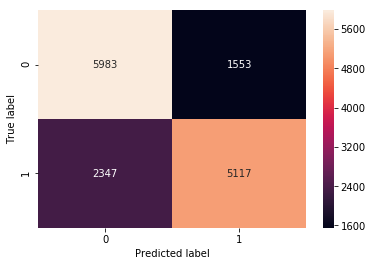

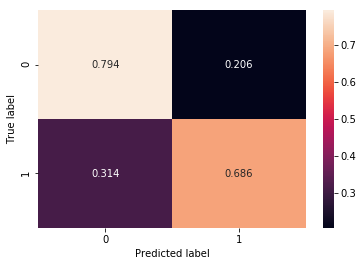

In [20]:
# Confusion matrix to see the true and false negative rate, 
#and true and false positive rate

cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Normalise by row
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot=True, fmt='.3f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

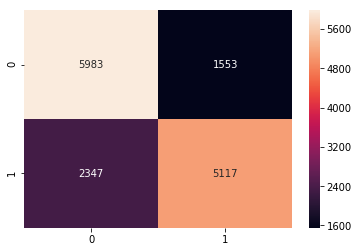

In [21]:
nr_true_positives = sum((y_test==1) & (y_hat==1))
nr_false_positives = sum((y_test==0) & (y_hat==1))
nr_true_negatives = sum((y_test==0) & (y_hat==0))
nr_false_negatives = sum((y_test==1) & (y_hat==0))


manual_cm = np.array([
    [nr_true_negatives, nr_false_positives],
    [nr_false_negatives, nr_true_positives]
])

sns.heatmap(manual_cm, annot=True, fmt='d')

In [22]:
# Getting the precision, recall, and f1 score

nr_predicted_positive = nr_true_positives + nr_false_positives
precision = nr_true_positives / nr_predicted_positive
nr_positive_cases = nr_true_positives + nr_false_negatives
recall = nr_true_positives / nr_positive_cases
f1 = 2*(precision*recall) / (precision+recall)
f"Class 1 precision: {precision:.3f}, recall: {recall:.3f}, f1: {f1:.3f}"

'Class 1 precision: 0.767, recall: 0.686, f1: 0.724'

In [23]:
#Check the values against sklearn.metrics.classification_report
print(classification_report(y_test, y_hat, digits=3))

              precision    recall  f1-score   support

         0.0      0.718     0.794     0.754      7536
         1.0      0.767     0.686     0.724      7464

    accuracy                          0.740     15000
   macro avg      0.743     0.740     0.739     15000
weighted avg      0.743     0.740     0.739     15000



In [24]:
#Using GridSearchCV with RandomForestClassifier
parameters = {"max_depth": [3, 5],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10]}

clf = RandomForestClassifier(n_estimators=200)

grid_cv = GridSearchCV(clf, parameters)

grid_cv.fit(X_train, y_train)

/Users/pola/miniconda3/envs/kate/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             i

In [25]:
# checking best parameters
grid_cv.best_params_

{'max_depth': 3, 'max_features': 1, 'min_samples_split': 3}

In [26]:
df_results = pd.DataFrame(grid_cv.cv_results_).sort_values('rank_test_score')
df_results.mean_test_score

1     0.740829
11    0.738686
0     0.733457
17    0.732857
9     0.732514
16    0.732000
14    0.731971
15    0.731914
2     0.729971
10    0.729886
12    0.726714
5     0.726457
4     0.724371
7     0.723600
8     0.722486
13    0.722171
6     0.707629
3     0.707257
Name: mean_test_score, dtype: float64

In [27]:
y_pred_rf = grid_cv.best_estimator_.predict(X_test)
roc_auc_score(y_test, y_pred_rf)

0.7106943477311051

# Evaluation

In [28]:
def get_fpr_tpr(y, y_pred, thresh):
    # Write a function which gets the false positive rate
    # and true positive rate when given a threshold
 
    nr_positive_cases = sum(y==1)
    nr_negative_cases = sum(y==0)
    y_hat = y_pred >= thresh
    nr_true_positives = sum((y==1) & (y_hat==1))
    nr_false_positives = sum((y==0) & (y_hat==1))
    tpr = nr_true_positives / nr_positive_cases
    fpr = nr_false_positives / nr_negative_cases
    return fpr, tpr


def my_roc_curve(y, y_pred):
    # we need only check a finite number of thresholds
    # get the unique values in y_pred and sort them
    
    thresh = np.sort(np.unique(y_pred))
    
    # Loop through all the thresholds and record the 
    # fpr and tpr in an array
    fpr_array = np.zeros_like(thresh)
    tpr_array = np.zeros_like(thresh)
    for ii, tt in enumerate(thresh):
        fpr, tpr  = get_fpr_tpr(y, y_pred, tt)
        fpr_array[ii] = fpr
        tpr_array[ii] = tpr
    return fpr_array, tpr_array, thresh

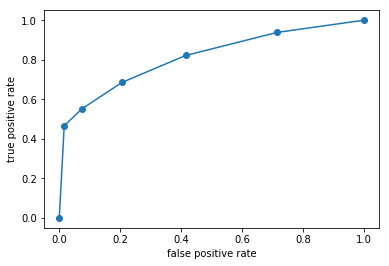

In [29]:
# we can now test this for our knn and plot
y_pred = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresh = my_roc_curve(y_test, y_pred)
plt.plot(np.append(fpr, 0), np.append(tpr, 0), 'o-')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

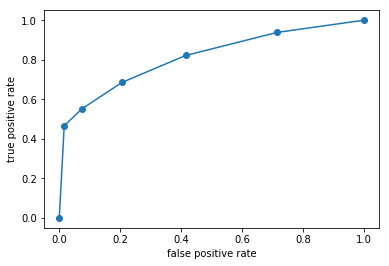

In [30]:
# And we can check it against the sklearn implementation
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, 'o-')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [31]:
# ROC score
roc_auc_score(y_test, y_pred)

0.8125048534451567

/Users/pola/miniconda3/envs/kate/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


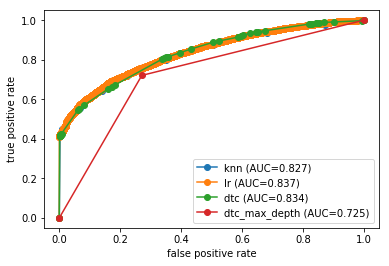

In [32]:
# defining the methods to compare

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
lr =  LogisticRegression()
lr.fit(X_train, y_train)

dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, y_train)

dtc_max = DecisionTreeClassifier(criterion='entropy', max_depth=None)
dtc_max.fit(X_train, y_train)


classifiers = {
    'knn': knn,
    'lr': lr,
    'dtc': dtc,
    'dtc_max_depth': dtc_max
}

for name, clf in classifiers.items():
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, 'o-', label=f"{name} (AUC={auc:.3f})")

plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

The chart shows dtc, knn and lr similars results, dtc for the max depth has more false positive rate 